In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv("test_1.csv", parse_dates=["fecha_hora"])
df.head()

,fecha_hora,Ro_1a_Media,Ro_1a_FC,Ro_1a_K,Ro_1b_Media,Ro_1b_FC,Ro_1b_K,Ro_2a_Media,Ro_2a_FC,Ro_2a_K,...,Ro_3a_K,Ro_3b_Media,Ro_3b_FC,Ro_3b_K,Ro_4a_Media,Ro_4a_FC,Ro_4a_K,Ro_4b_Media,Ro_4b_FC,Ro_4b_K
0,2003-10-22 12:06:24,0.104144,5.777850,1.069717,0.100250,5.966305,3.066925,0.107151,5.166521,0.209830,...,0.405831,0.108152,5.947454,0.777546,0.094804,3.788279,0.790736,0.099515,4.086150,1.808725
1,2003-10-22 12:09:13,0.103652,5.282236,1.162128,0.099853,4.972931,2.001798,0.108190,4.905319,0.229733,...,0.446120,0.108453,4.362016,0.682736,0.095070,3.856767,1.235297,0.093585,5.741343,1.873939
2,2003-10-22 12:14:13,0.105036,4.974196,0.986819,0.101540,4.637434,1.969725,0.108548,4.647262,0.209045,...,0.390100,0.109881,4.651150,0.750898,0.096157,3.589583,0.925227,0.098300,5.286029,1.430337
3,2003-10-22 12:19:13,0.104898,4.776455,1.034839,0.101570,4.495626,1.746089,0.108150,4.543583,0.189363,...,0.262319,0.110006,5.105655,0.667669,0.096813,3.539356,0.653119,0.098600,4.588643,1.378814
4,2003-10-22 12:24:13,0.104776,4.959475,1.110728,0.102188,4.486647,1.181742,0.107943,5.543711,0.261214,...,0.326564,0.109349,4.674347,0.475712,0.096359,3.412278,0.636024,0.098468,4.568625,1.498312


In [9]:
# Seleccionar solo las columnas de Crest Factor (_FC)
fc_cols = [col for col in df.columns if col.endswith("_FC")]
df = df[["fecha_hora"] + fc_cols]  # Mantener fecha_hora para análisis temporal

# Revisar datos faltantes
df.isnull().sum()

fecha_hora    0
Ro_1a_FC      0
Ro_1b_FC      0
Ro_2a_FC      0
Ro_2b_FC      0
Ro_3a_FC      0
Ro_3b_FC      0
Ro_4a_FC      0
Ro_4b_FC      0
dtype: int64

In [10]:
df.head()

,fecha_hora,Ro_1a_FC,Ro_1b_FC,Ro_2a_FC,Ro_2b_FC,Ro_3a_FC,Ro_3b_FC,Ro_4a_FC,Ro_4b_FC
0,2003-10-22 12:06:24,5.777850,5.966305,5.166521,4.357044,3.848331,5.947454,3.788279,4.086150
1,2003-10-22 12:09:13,5.282236,4.972931,4.905319,5.115330,4.368562,4.362016,3.856767,5.741343
2,2003-10-22 12:14:13,4.974196,4.637434,4.647262,3.495929,4.575949,4.651150,3.589583,5.286029
3,2003-10-22 12:19:13,4.776455,4.495626,4.543583,3.934815,4.211079,5.105655,3.539356,4.588643
4,2003-10-22 12:24:13,4.959475,4.486647,5.543711,4.685479,4.013483,4.674347,3.412278,4.568625


In [11]:
# Filtrar solo las columnas numéricas para aplicar MinMaxScaler
crest_factor_cols = [col for col in df.columns if col.endswith("_FC")]

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Crear una copia del DataFrame para no modificar el original
df_scaled = df.copy()

# Aplicar MinMaxScaler solo a las columnas numéricas del Crest Factor
df_scaled[crest_factor_cols] = scaler.fit_transform(df[crest_factor_cols])

# Inicializar el modelo Isolation Forest
model = IsolationForest(contamination=0.01)  # Define el porcentaje de anomalías

# Ajustar el modelo sobre los datos escalados
model.fit(df_scaled[crest_factor_cols])  # Usamos solo las columnas de Crest Factor

# Predecir las anomalías (1: normal, -1: anómalo)
df['anomaly'] = model.predict(df_scaled[crest_factor_cols])

df.head()


,fecha_hora,Ro_1a_FC,Ro_1b_FC,Ro_2a_FC,Ro_2b_FC,Ro_3a_FC,Ro_3b_FC,Ro_4a_FC,Ro_4b_FC,anomaly
0,2003-10-22 12:06:24,5.777850,5.966305,5.166521,4.357044,3.848331,5.947454,3.788279,4.086150,1
1,2003-10-22 12:09:13,5.282236,4.972931,4.905319,5.115330,4.368562,4.362016,3.856767,5.741343,1
2,2003-10-22 12:14:13,4.974196,4.637434,4.647262,3.495929,4.575949,4.651150,3.589583,5.286029,1
3,2003-10-22 12:19:13,4.776455,4.495626,4.543583,3.934815,4.211079,5.105655,3.539356,4.588643,1
4,2003-10-22 12:24:13,4.959475,4.486647,5.543711,4.685479,4.013483,4.674347,3.412278,4.568625,1


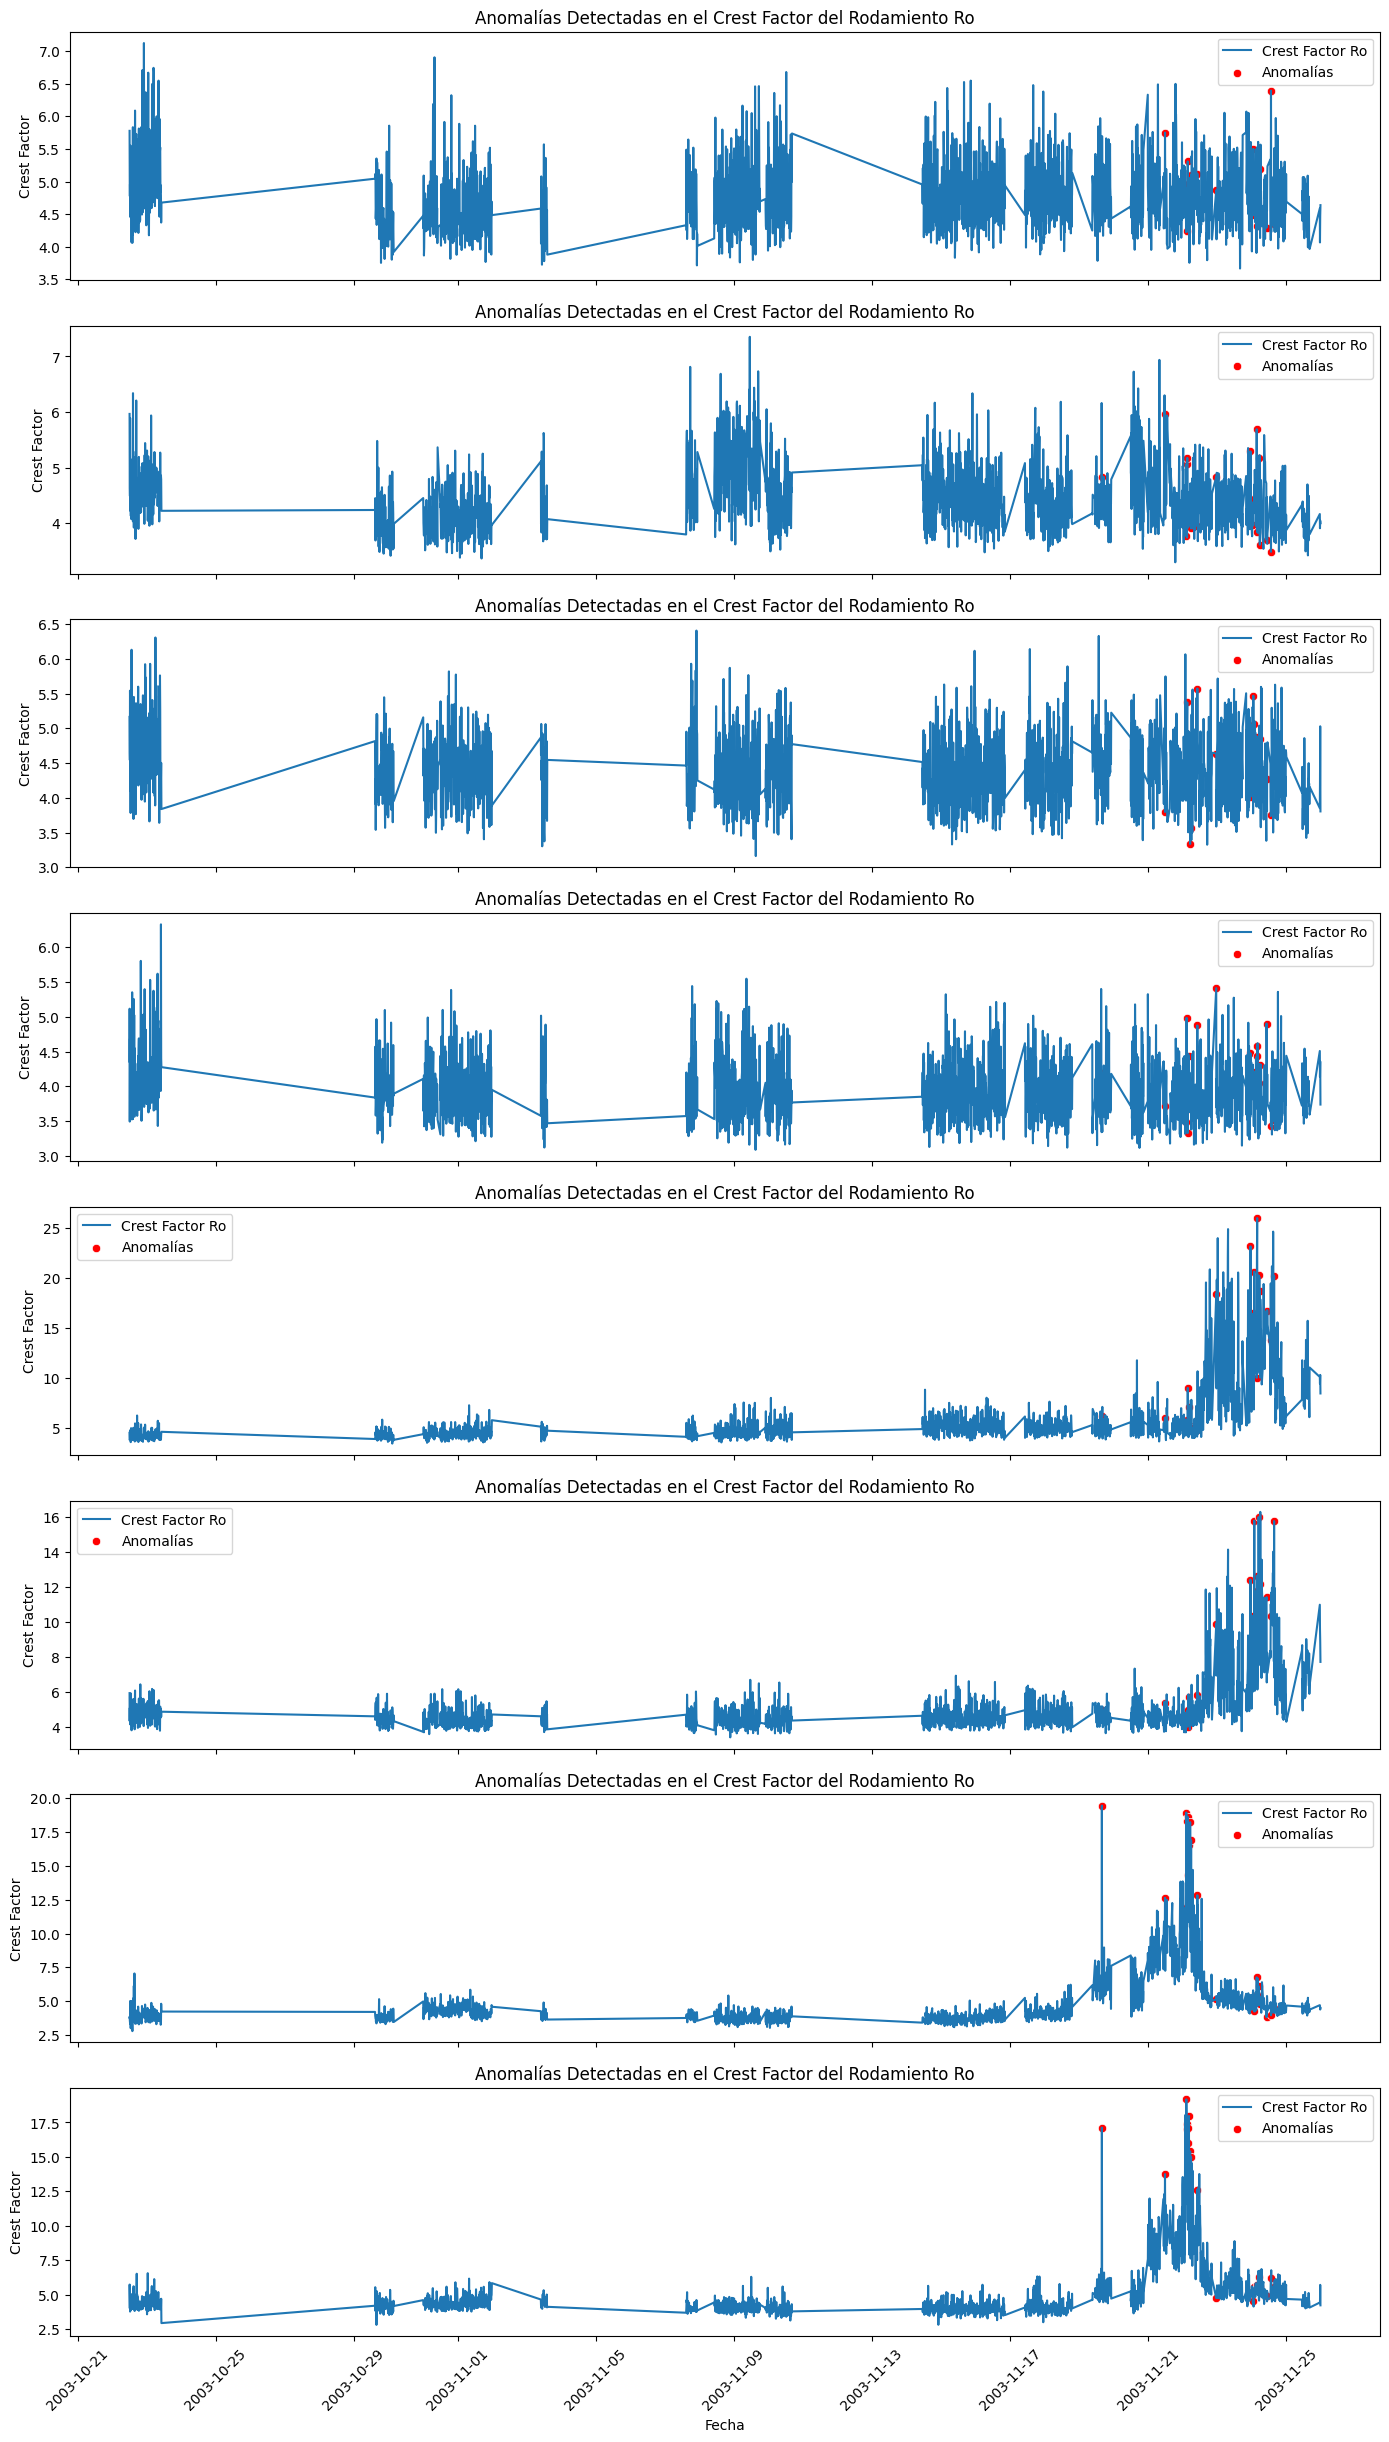

In [12]:
# Crear el gráfico con subgráficas
num_plots = len(crest_factor_cols)  # Número de rodamientos (columnas de Crest Factor)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(14, 3 * num_plots), sharex=True)

# Graficar el valor de Crest Factor y resaltar las anomalías para cada rodamiento
for i, col in enumerate(crest_factor_cols):
    rodamiento_num = col.split('_')[0]  # Obtener el número del rodamiento a partir del nombre de la columna
    
    # Graficar el valor de Crest Factor para el rodamiento
    sns.lineplot(data=df, x='fecha_hora', y=col, ax=axes[i], label=f'Crest Factor {rodamiento_num}')
    
    # Resaltar las anomalías (coloca los puntos en color rojo)
    sns.scatterplot(data=df[df['anomaly'] == -1], x='fecha_hora', y=col, color='red', ax=axes[i], label='Anomalías')

    # Agregar título y etiquetas
    axes[i].set_title(f'Anomalías Detectadas en el Crest Factor del Rodamiento {rodamiento_num}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Crest Factor')
    axes[i].legend()

# Ajustar el layout y mostrar la gráfica
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [13]:
from sklearn.svm import OneClassSVM

# Inicializar el modelo One-Class SVM
model = OneClassSVM(nu=0.01)  # nu controla la proporción de anomalías esperadas

# Ajustar el modelo sobre los datos escalados
model.fit(df_scaled[crest_factor_cols])

# Predecir las anomalías (1: normal, -1: anómalo)
df['anomaly_svm'] = model.predict(df_scaled[crest_factor_cols])

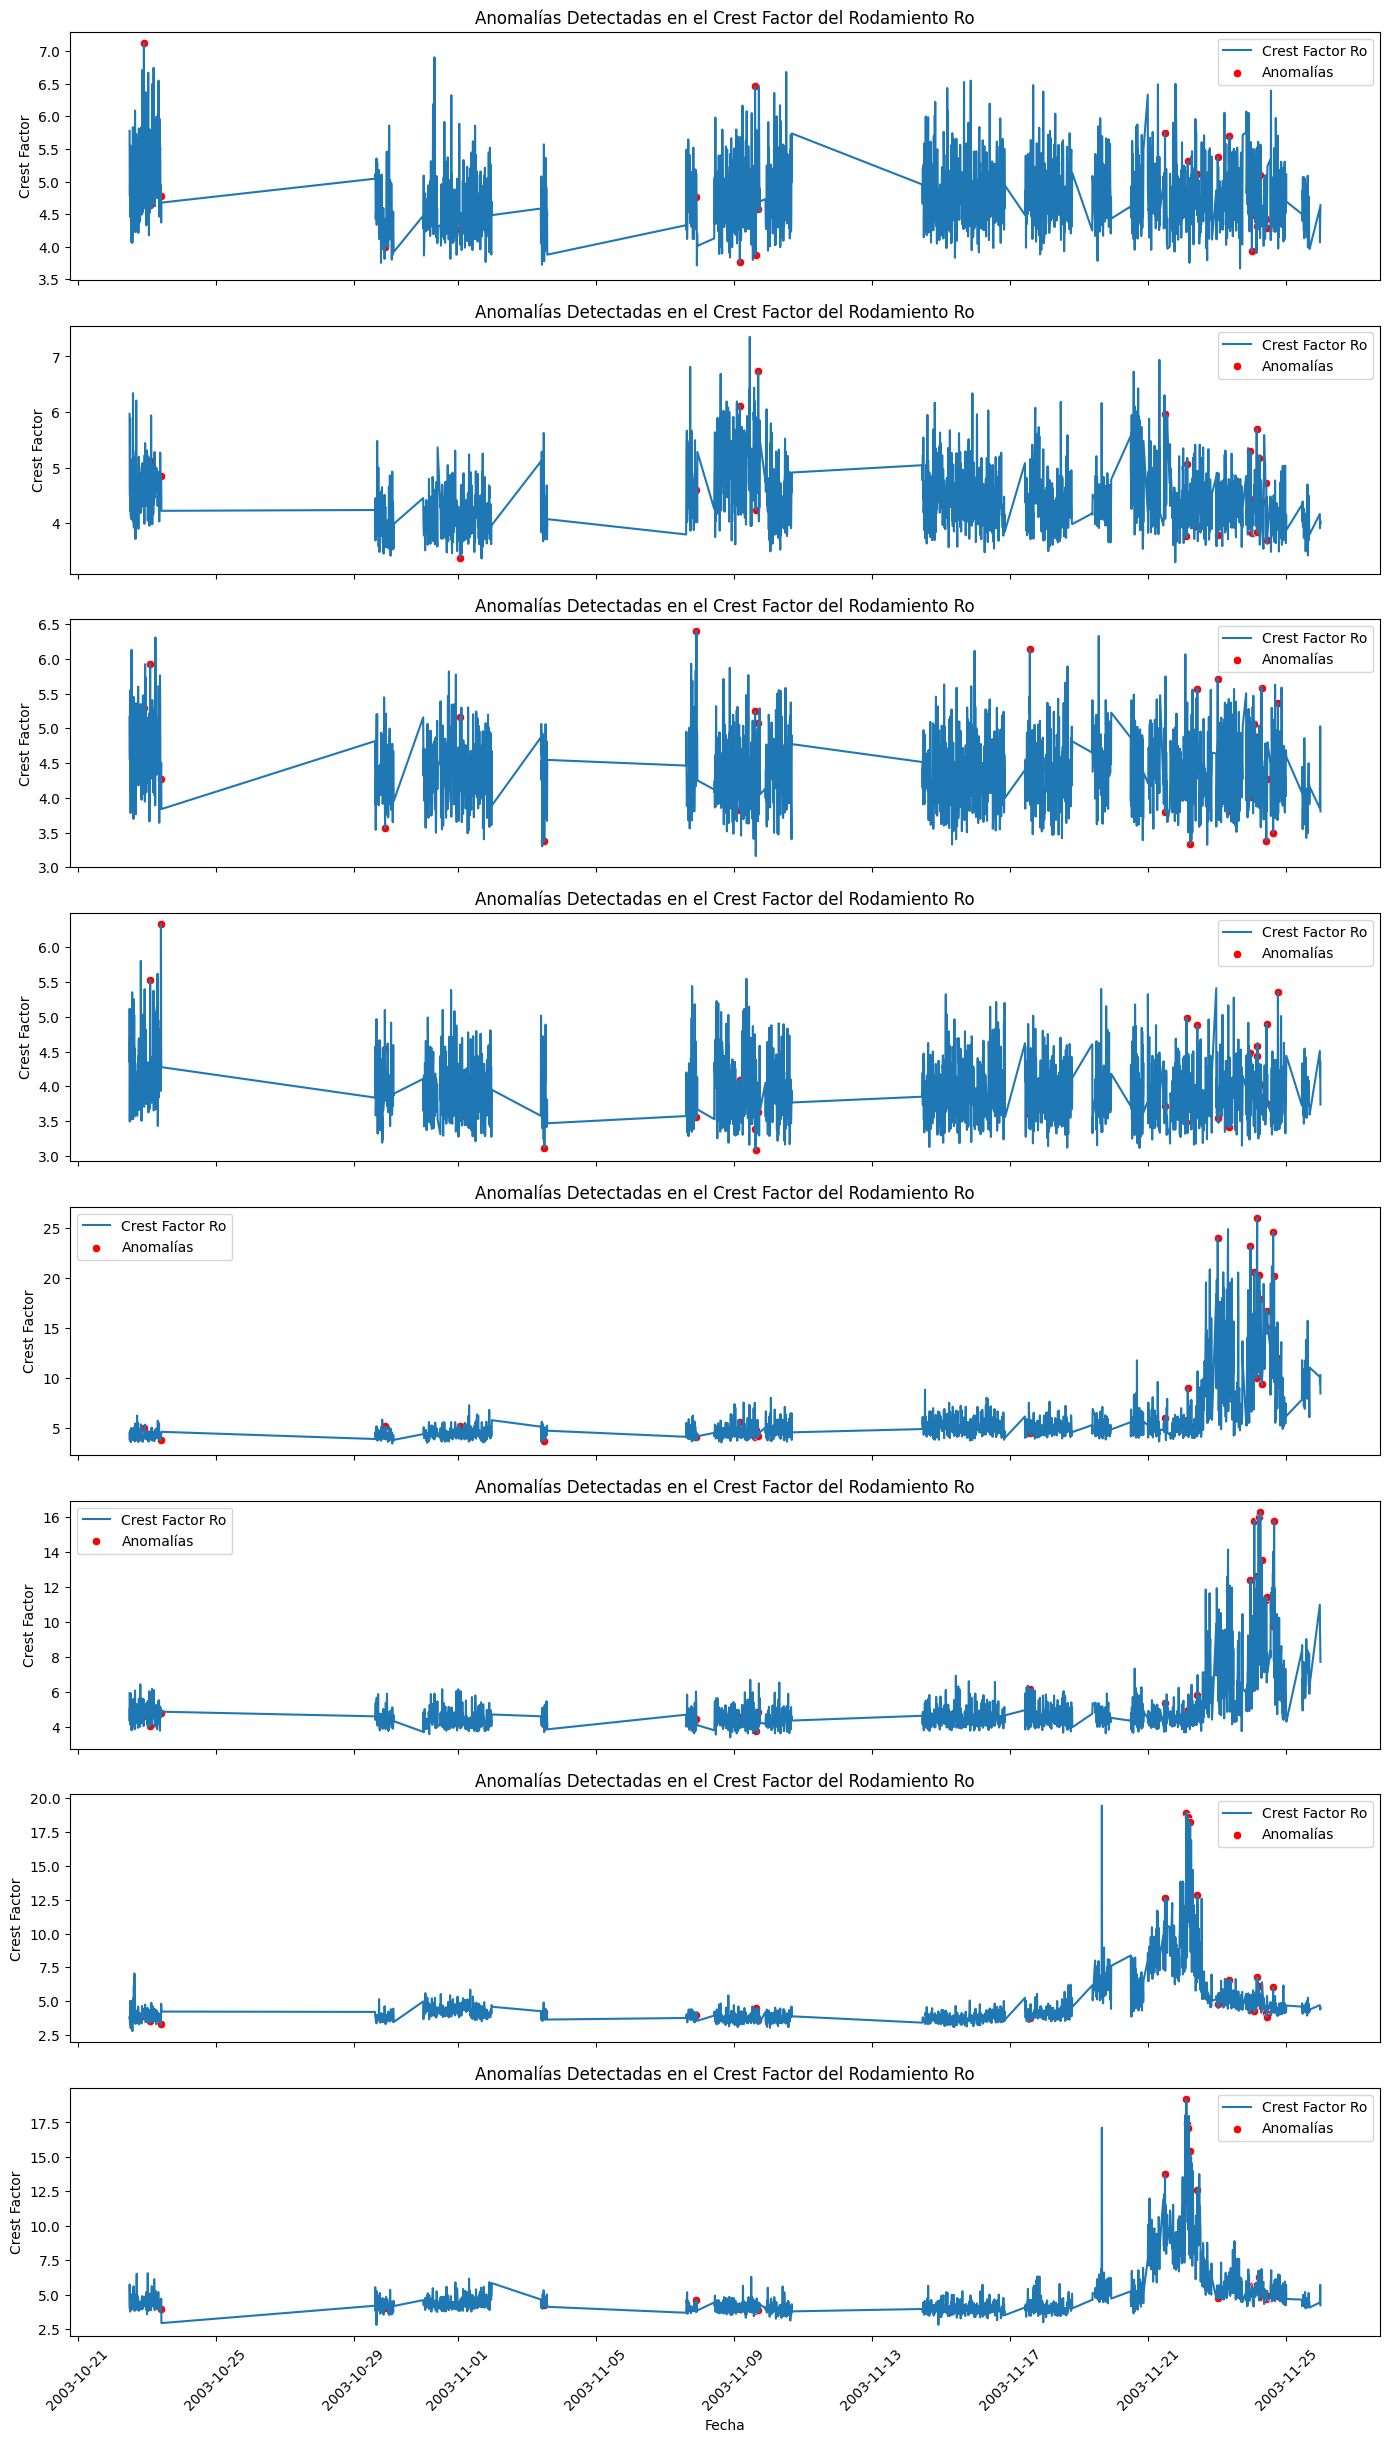

In [14]:
# Crear el gráfico con subgráficas
num_plots = len(crest_factor_cols)  # Número de rodamientos (columnas de Crest Factor)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(14, 3 * num_plots), sharex=True)

# Graficar el valor de Crest Factor y resaltar las anomalías para cada rodamiento
for i, col in enumerate(crest_factor_cols):
    rodamiento_num = col.split('_')[0]  # Obtener el número del rodamiento a partir del nombre de la columna
    
    # Graficar el valor de Crest Factor para el rodamiento
    sns.lineplot(data=df, x='fecha_hora', y=col, ax=axes[i], label=f'Crest Factor {rodamiento_num}')
    
    # Resaltar las anomalías (coloca los puntos en color rojo)
    sns.scatterplot(data=df[df['anomaly_svm'] == -1], x='fecha_hora', y=col, color='red', ax=axes[i], label='Anomalías')

    # Agregar título y etiquetas
    axes[i].set_title(f'Anomalías Detectadas en el Crest Factor del Rodamiento {rodamiento_num}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Crest Factor')
    axes[i].legend()

# Ajustar el layout y mostrar la gráfica
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [15]:
from sklearn.neighbors import LocalOutlierFactor

# Inicializar el modelo LOF
model = LocalOutlierFactor(n_neighbors=20, contamination=0.01)

# Predecir las anomalías (1: normal, -1: anómalo)
df['anomaly_lof'] = model.fit_predict(df_scaled[crest_factor_cols])

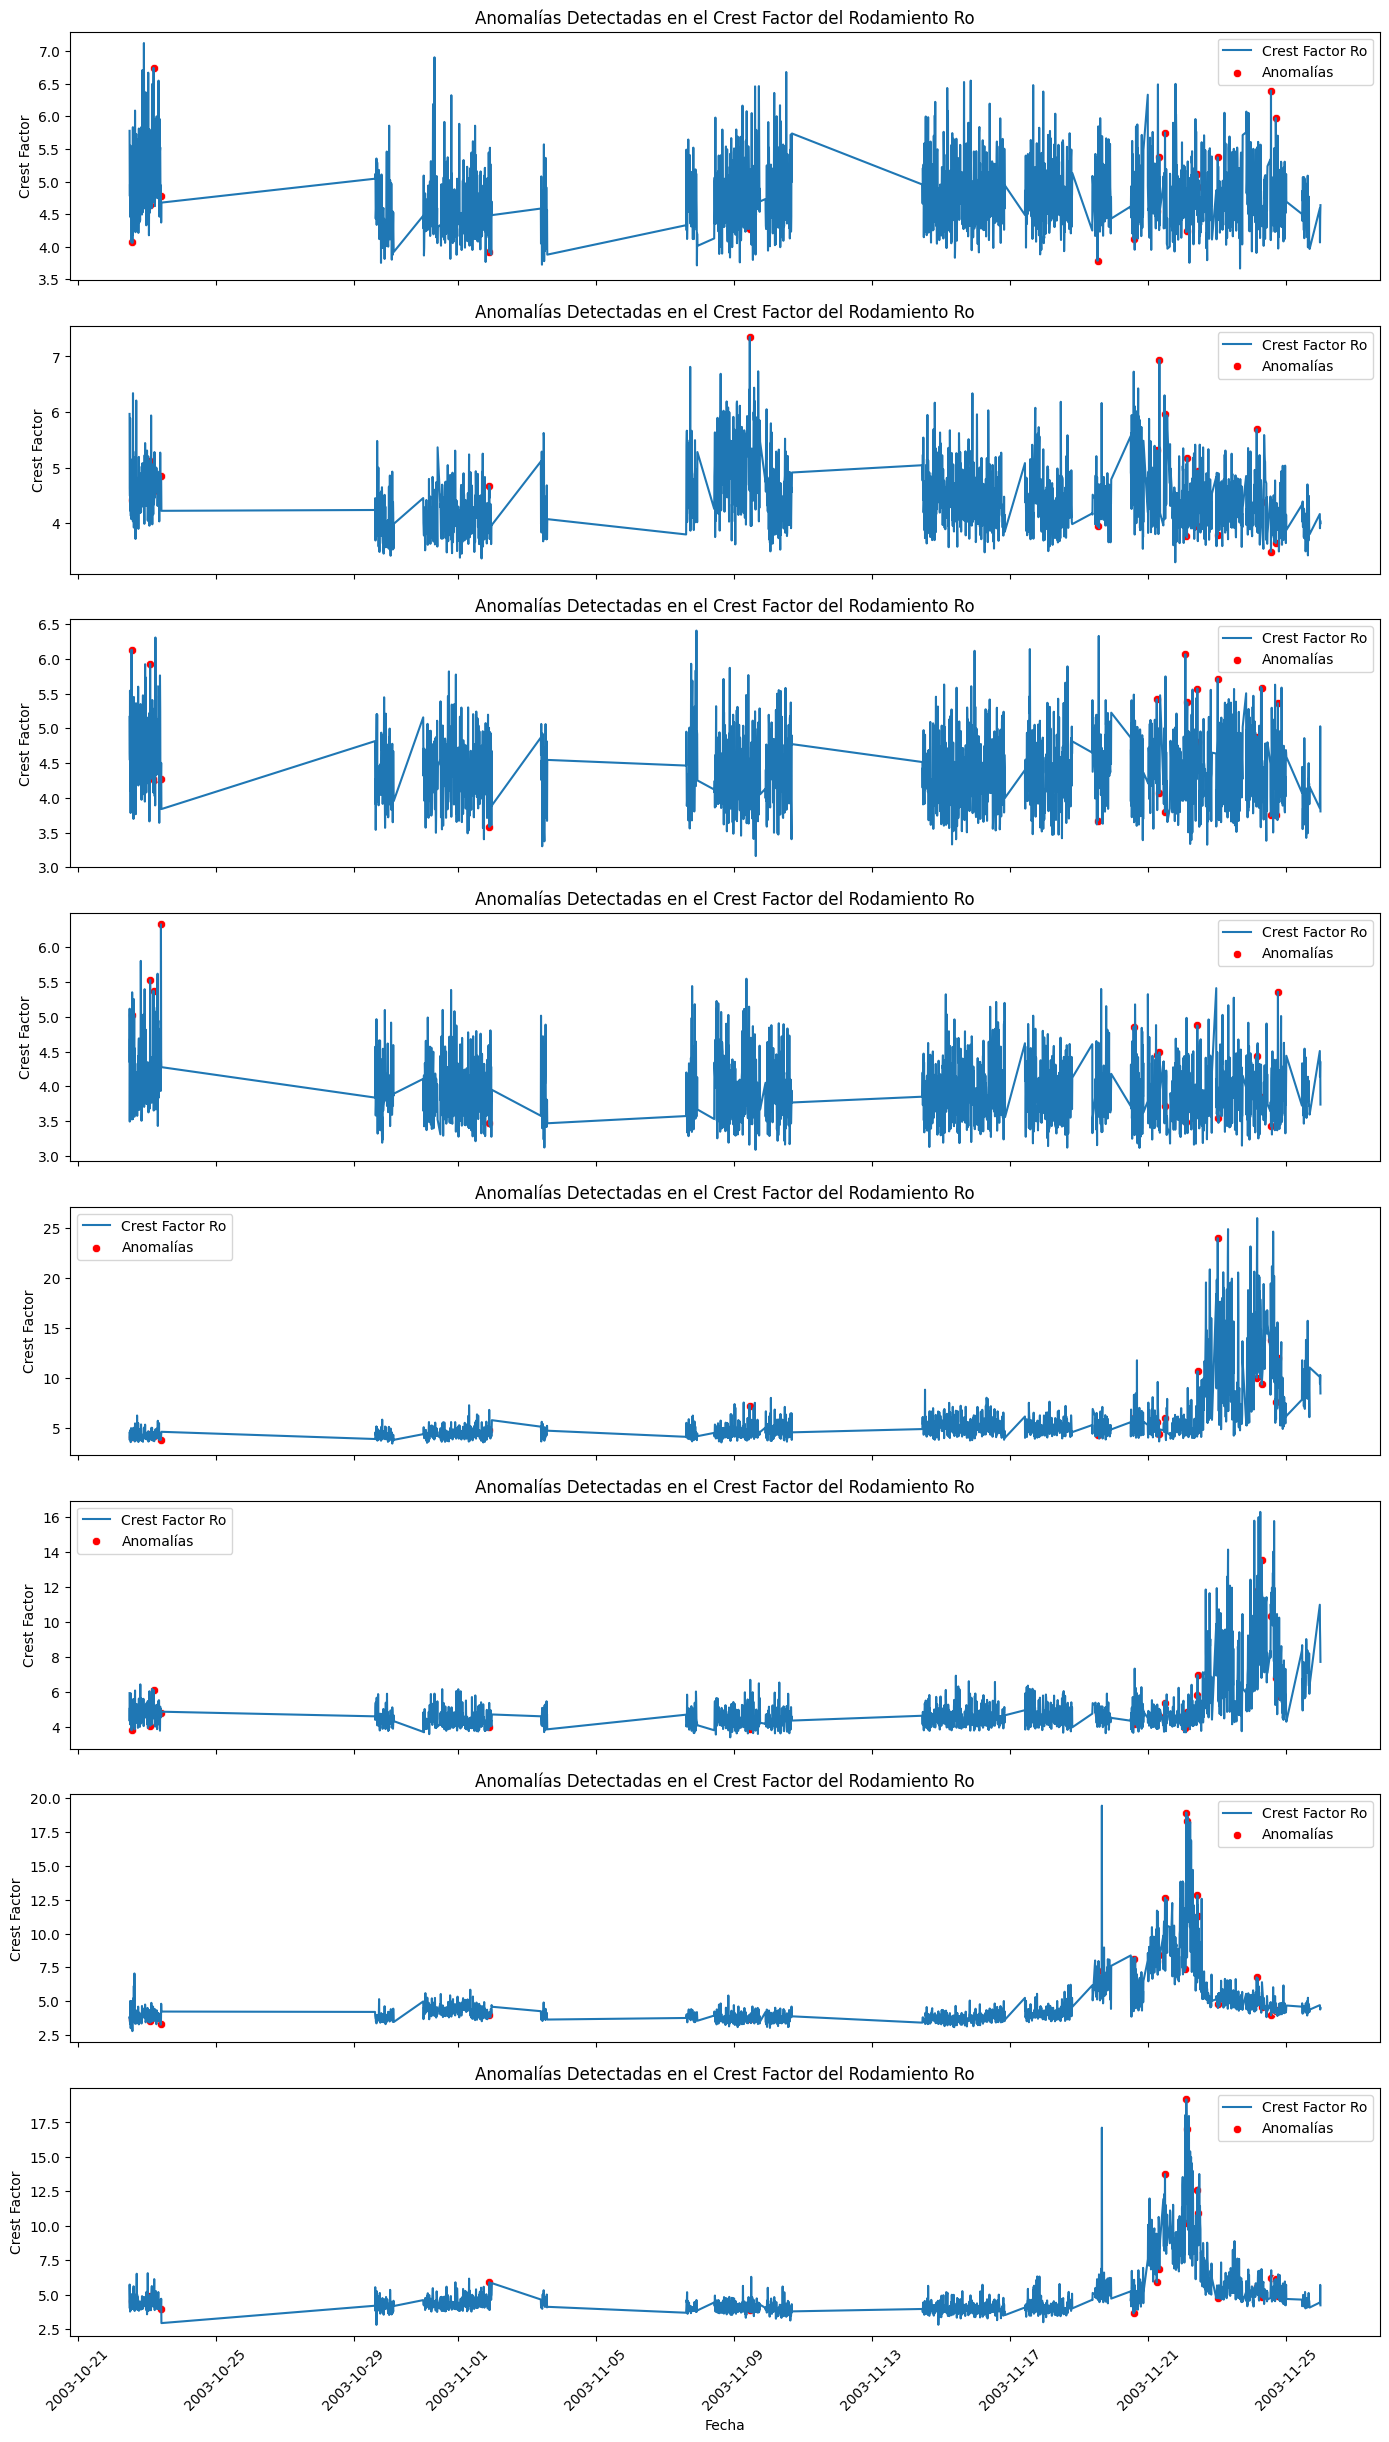

In [16]:
# Crear el gráfico con subgráficas
num_plots = len(crest_factor_cols)  # Número de rodamientos (columnas de Crest Factor)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(14, 3 * num_plots), sharex=True)

# Graficar el valor de Crest Factor y resaltar las anomalías para cada rodamiento
for i, col in enumerate(crest_factor_cols):
    rodamiento_num = col.split('_')[0]  # Obtener el número del rodamiento a partir del nombre de la columna
    
    # Graficar el valor de Crest Factor para el rodamiento
    sns.lineplot(data=df, x='fecha_hora', y=col, ax=axes[i], label=f'Crest Factor {rodamiento_num}')
    
    # Resaltar las anomalías (coloca los puntos en color rojo)
    sns.scatterplot(data=df[df['anomaly_lof'] == -1], x='fecha_hora', y=col, color='red', ax=axes[i], label='Anomalías')

    # Agregar título y etiquetas
    axes[i].set_title(f'Anomalías Detectadas en el Crest Factor del Rodamiento {rodamiento_num}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Crest Factor')
    axes[i].legend()

# Ajustar el layout y mostrar la gráfica
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Definir la arquitectura del autoencoder
input_dim = df_scaled[crest_factor_cols].shape[1]
encoding_dim = 10  # Dimensión del espacio latente

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el autoencoder
autoencoder.fit(df_scaled[crest_factor_cols], df_scaled[crest_factor_cols], epochs=100, batch_size=32, shuffle=True)

# Calcular el error de reconstrucción
reconstructions = autoencoder.predict(df_scaled[crest_factor_cols])
mse = np.mean(np.power(df_scaled[crest_factor_cols] - reconstructions, 2), axis=1)

# Asignar anomalías basadas en un umbral
threshold = np.quantile(mse, 0.99)  # Umbral del 99%
df['anomaly_ae'] = (mse > threshold).astype(int)


Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0902  
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0516
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0308
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0244
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0215
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0203
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0191
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0191
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0181 
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0182
Epoch 11/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169 
Epoch 12/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165
Epoch 13/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0165
Epoch 14/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0156
Epoch 15/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145


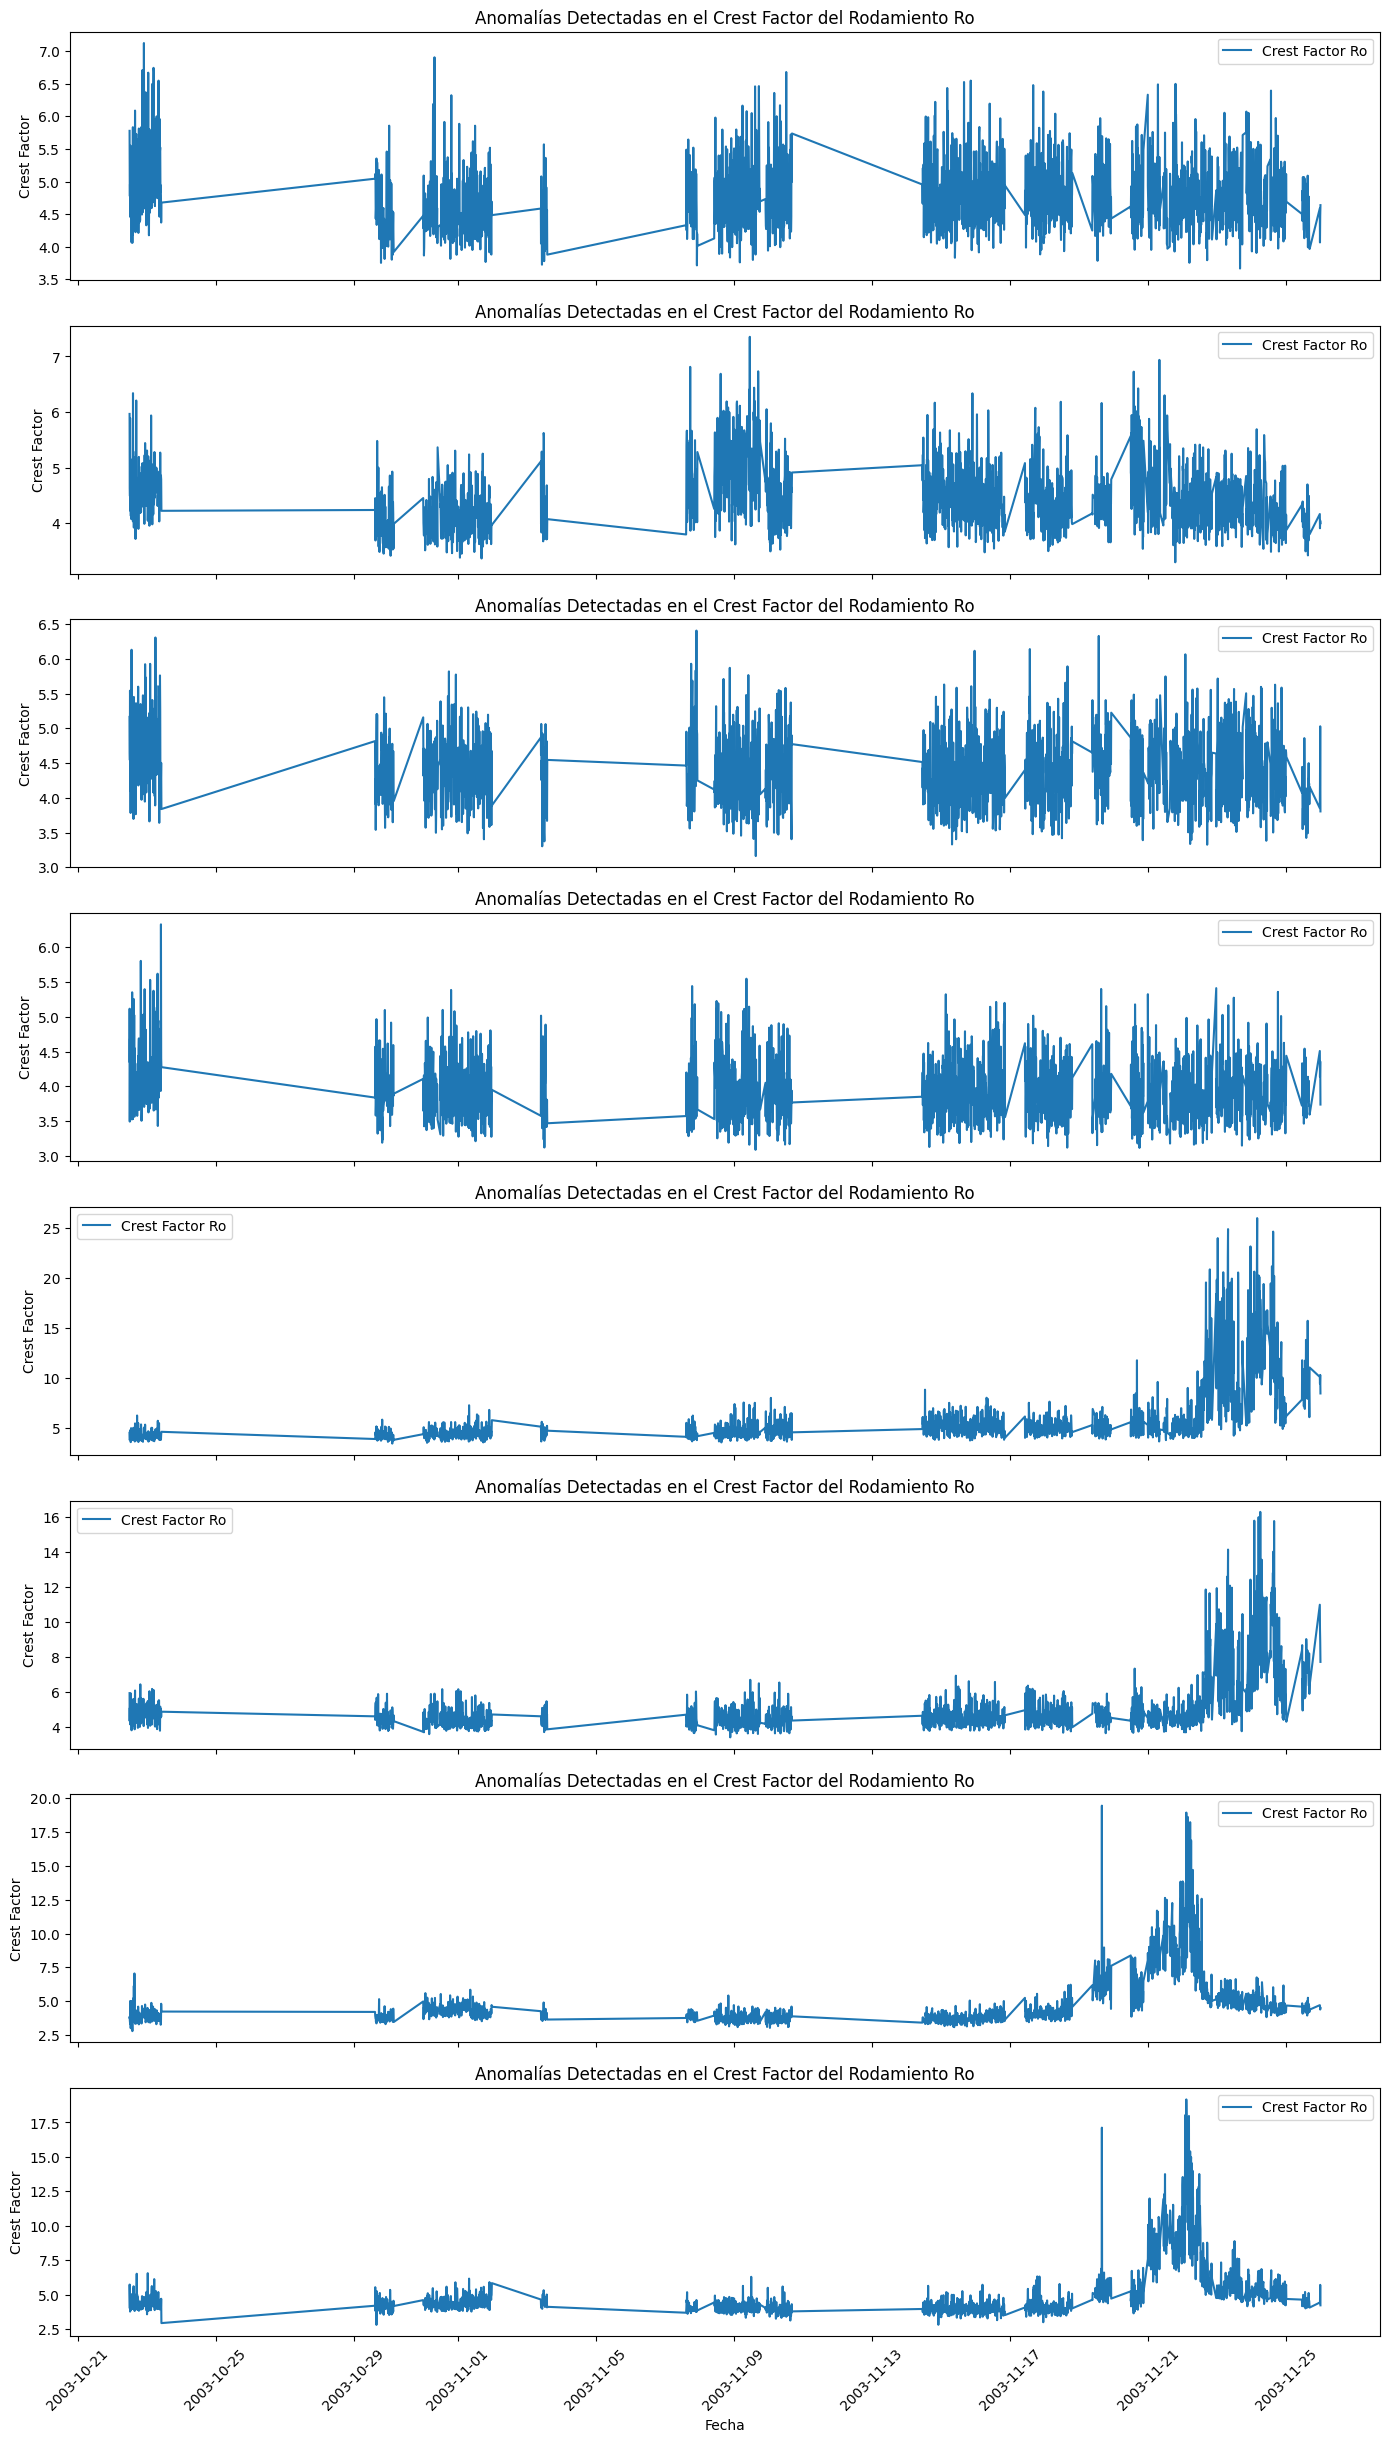

In [21]:
# Crear el gráfico con subgráficas
num_plots = len(crest_factor_cols)  # Número de rodamientos (columnas de Crest Factor)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(14, 3 * num_plots), sharex=True)

# Graficar el valor de Crest Factor y resaltar las anomalías para cada rodamiento
for i, col in enumerate(crest_factor_cols):
    rodamiento_num = col.split('_')[0]  # Obtener el número del rodamiento a partir del nombre de la columna
    
    # Graficar el valor de Crest Factor para el rodamiento
    sns.lineplot(data=df, x='fecha_hora', y=col, ax=axes[i], label=f'Crest Factor {rodamiento_num}')
    
    # Resaltar las anomalías (coloca los puntos en color rojo)
    sns.scatterplot(data=df[df['anomaly_ae'] == -1], x='fecha_hora', y=col, color='red', ax=axes[i], label='Anomalías')

    # Agregar título y etiquetas
    axes[i].set_title(f'Anomalías Detectadas en el Crest Factor del Rodamiento {rodamiento_num}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Crest Factor')
    axes[i].legend()

# Ajustar el layout y mostrar la gráfica
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [23]:
from sklearn.cluster import DBSCAN

# Inicializar el modelo DBSCAN
model = DBSCAN(eps=0.5, min_samples=10)

# Ajustar el modelo y predecir las anomalías
df['anomaly_db'] = model.fit_predict(df_scaled[crest_factor_cols])

# DBSCAN asigna -1 a los puntos considerados ruido (anomalías)
df['anomaly_db'] = (df['anomaly_db'] == -1).astype(int)

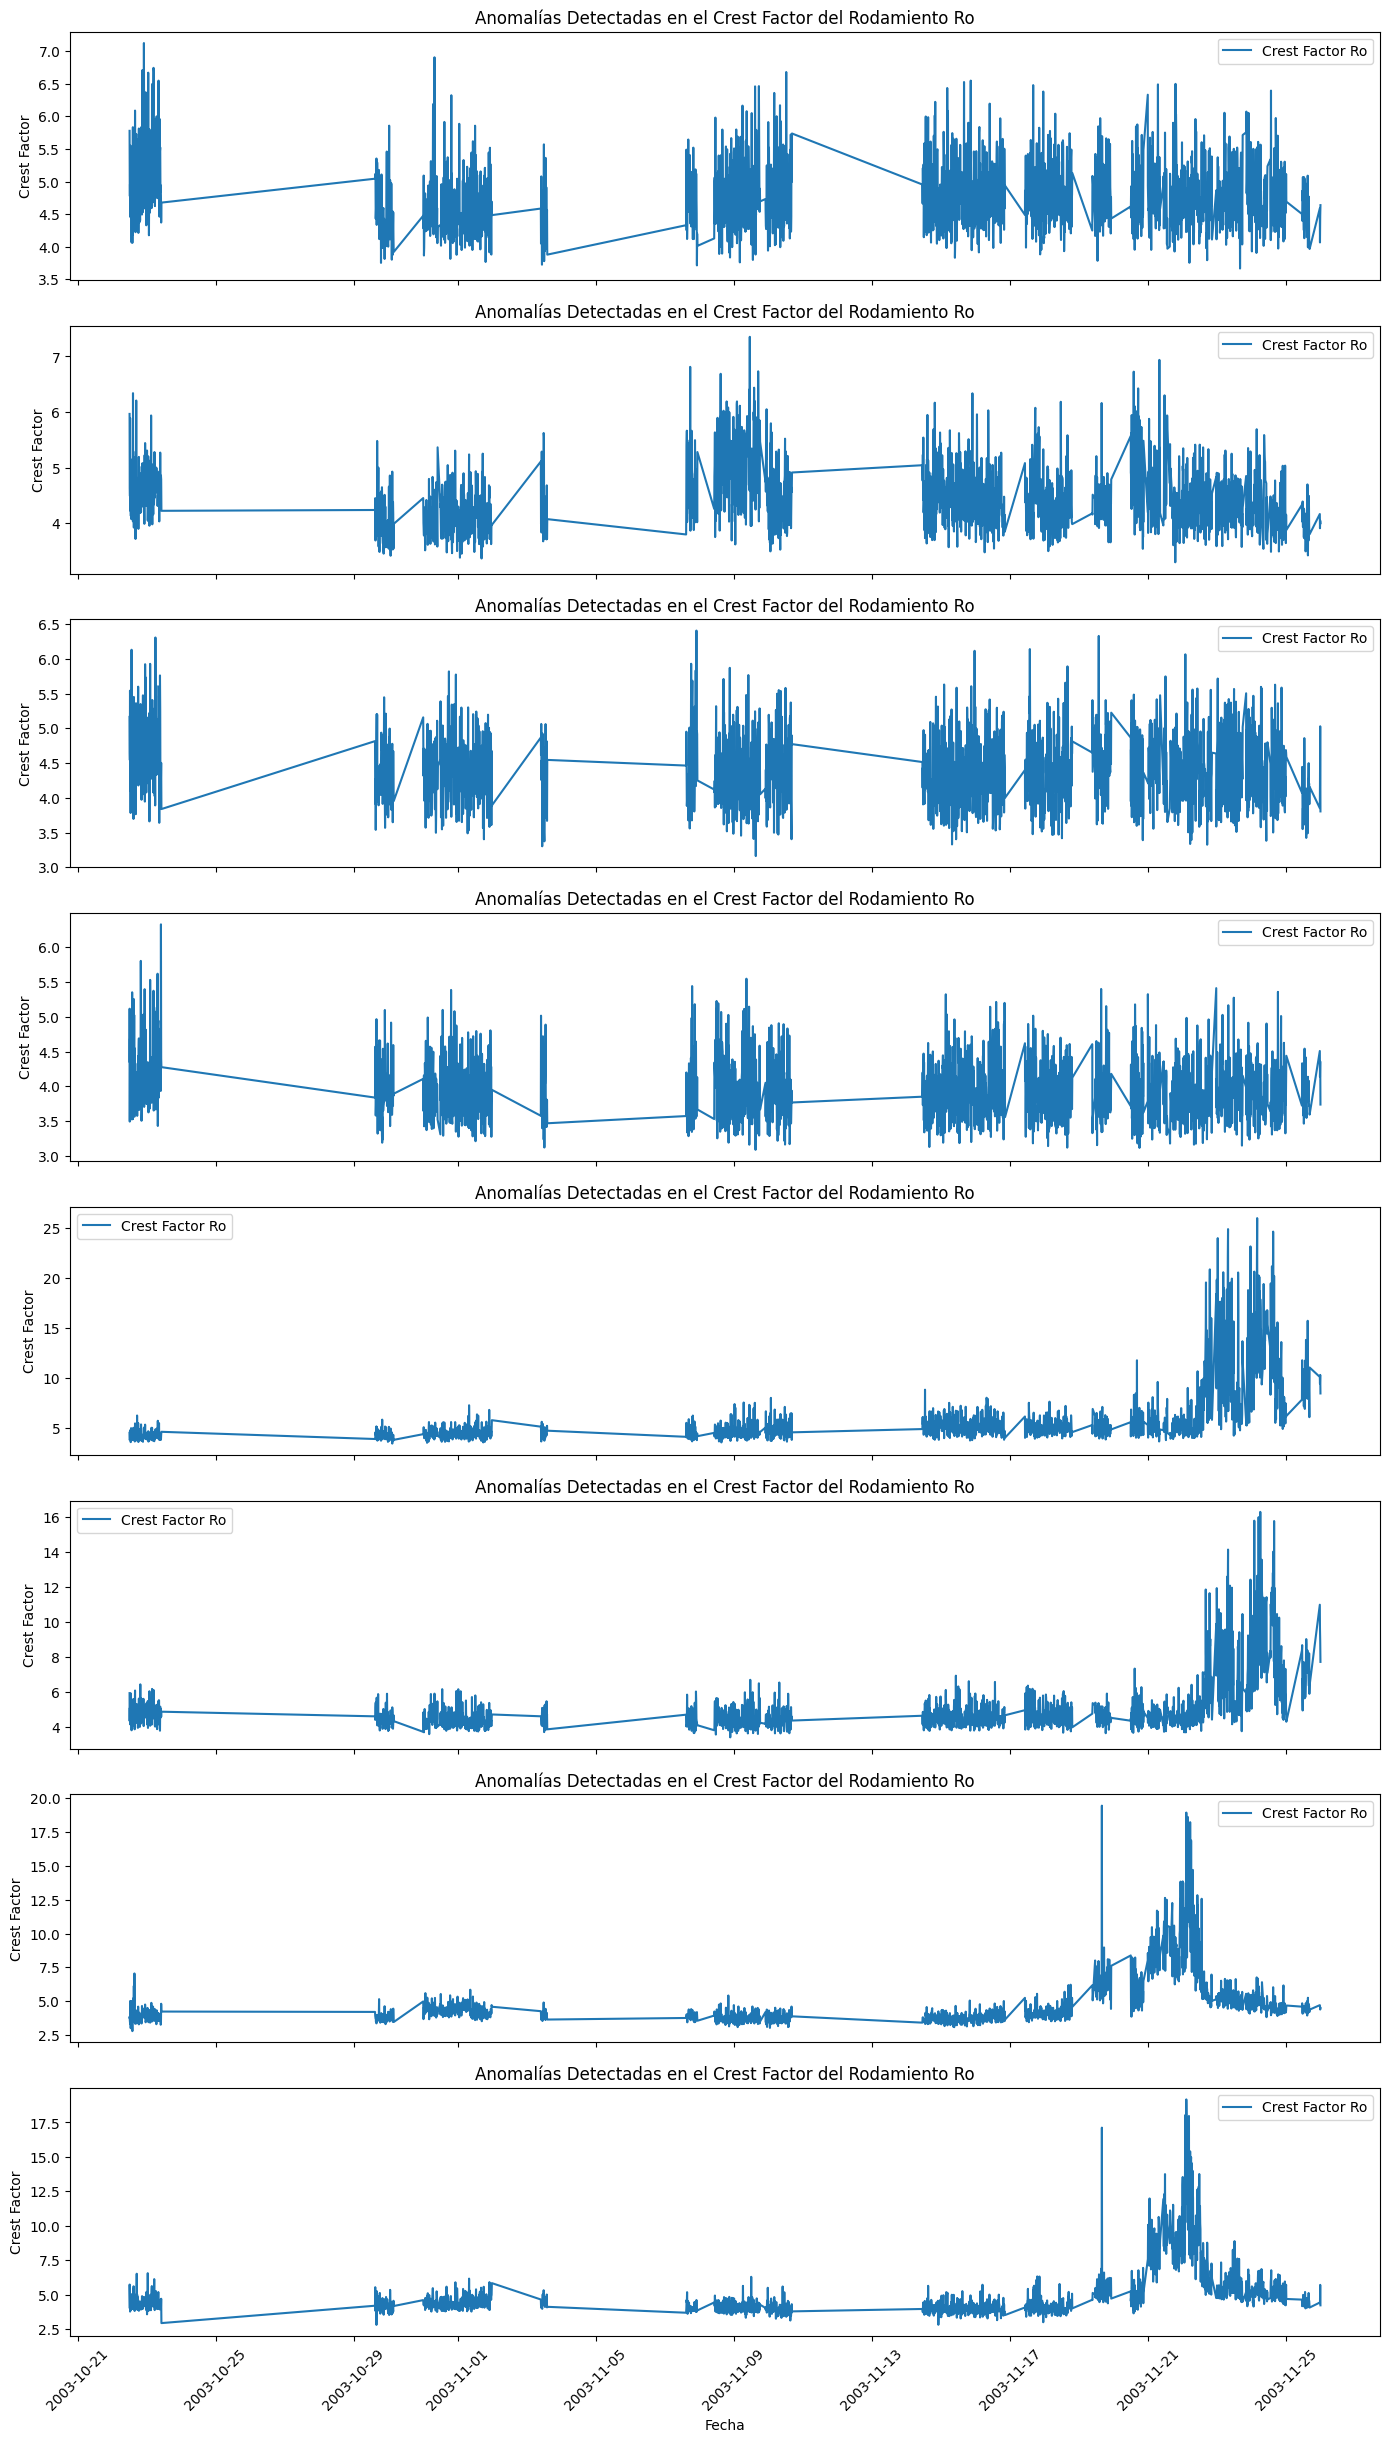

In [24]:
# Crear el gráfico con subgráficas
num_plots = len(crest_factor_cols)  # Número de rodamientos (columnas de Crest Factor)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(14, 3 * num_plots), sharex=True)

# Graficar el valor de Crest Factor y resaltar las anomalías para cada rodamiento
for i, col in enumerate(crest_factor_cols):
    rodamiento_num = col.split('_')[0]  # Obtener el número del rodamiento a partir del nombre de la columna
    
    # Graficar el valor de Crest Factor para el rodamiento
    sns.lineplot(data=df, x='fecha_hora', y=col, ax=axes[i], label=f'Crest Factor {rodamiento_num}')
    
    # Resaltar las anomalías (coloca los puntos en color rojo)
    sns.scatterplot(data=df[df['anomaly_db'] == -1], x='fecha_hora', y=col, color='red', ax=axes[i], label='Anomalías')

    # Agregar título y etiquetas
    axes[i].set_title(f'Anomalías Detectadas en el Crest Factor del Rodamiento {rodamiento_num}')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel('Crest Factor')
    axes[i].legend()

# Ajustar el layout y mostrar la gráfica
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [25]:
df.head()

,fecha_hora,Ro_1a_FC,Ro_1b_FC,Ro_2a_FC,Ro_2b_FC,Ro_3a_FC,Ro_3b_FC,Ro_4a_FC,Ro_4b_FC,anomaly,anomaly_svm,anomaly_lof,anomaly_ae,anomaly_db
0,2003-10-22 12:06:24,5.777850,5.966305,5.166521,4.357044,3.848331,5.947454,3.788279,4.086150,0,1,1,0,0
1,2003-10-22 12:09:13,5.282236,4.972931,4.905319,5.115330,4.368562,4.362016,3.856767,5.741343,0,1,1,0,0
2,2003-10-22 12:14:13,4.974196,4.637434,4.647262,3.495929,4.575949,4.651150,3.589583,5.286029,0,1,1,0,0
3,2003-10-22 12:19:13,4.776455,4.495626,4.543583,3.934815,4.211079,5.105655,3.539356,4.588643,0,1,1,0,0
4,2003-10-22 12:24:13,4.959475,4.486647,5.543711,4.685479,4.013483,4.674347,3.412278,4.568625,0,1,1,0,0


In [26]:
df_scaled.head()

,fecha_hora,Ro_1a_FC,Ro_1b_FC,Ro_2a_FC,Ro_2b_FC,Ro_3a_FC,Ro_3b_FC,Ro_4a_FC,Ro_4b_FC
0,2003-10-22 12:06:24,0.610606,0.658029,0.617281,0.391482,0.019414,0.196169,0.059913,0.077690
1,2003-10-22 12:09:13,0.467221,0.413124,0.536888,0.625878,0.042496,0.072853,0.064024,0.178871
2,2003-10-22 12:14:13,0.378103,0.330411,0.457462,0.125300,0.051698,0.095342,0.047986,0.151038
3,2003-10-22 12:19:13,0.320895,0.295450,0.425552,0.260965,0.035509,0.130694,0.044971,0.108407
4,2003-10-22 12:24:13,0.373844,0.293237,0.733373,0.493005,0.026742,0.097147,0.037343,0.107184
